In [ ]:
# Modelo preditivo que responda à pergunta: “que tipos de pessoas tinham mais probabilidade de sobreviver?

# modelo de classificação para prever se o passageiro sobrevive ou não.

In [85]:
%pip install pandas 
%pip install matplotlib 
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [139]:
# Importação das dependencias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [110]:
# Lendo o arquivo Titanic-Dataset
titanic=pd.read_csv("Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
# Visualizar os itens nulos 
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
# Visualizar os itens duplicados 
titanic.duplicated().sum()

np.int64(0)

In [114]:
# Agrupando idade por quantidade
age=titanic['Age'].value_counts()
print(age)

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64


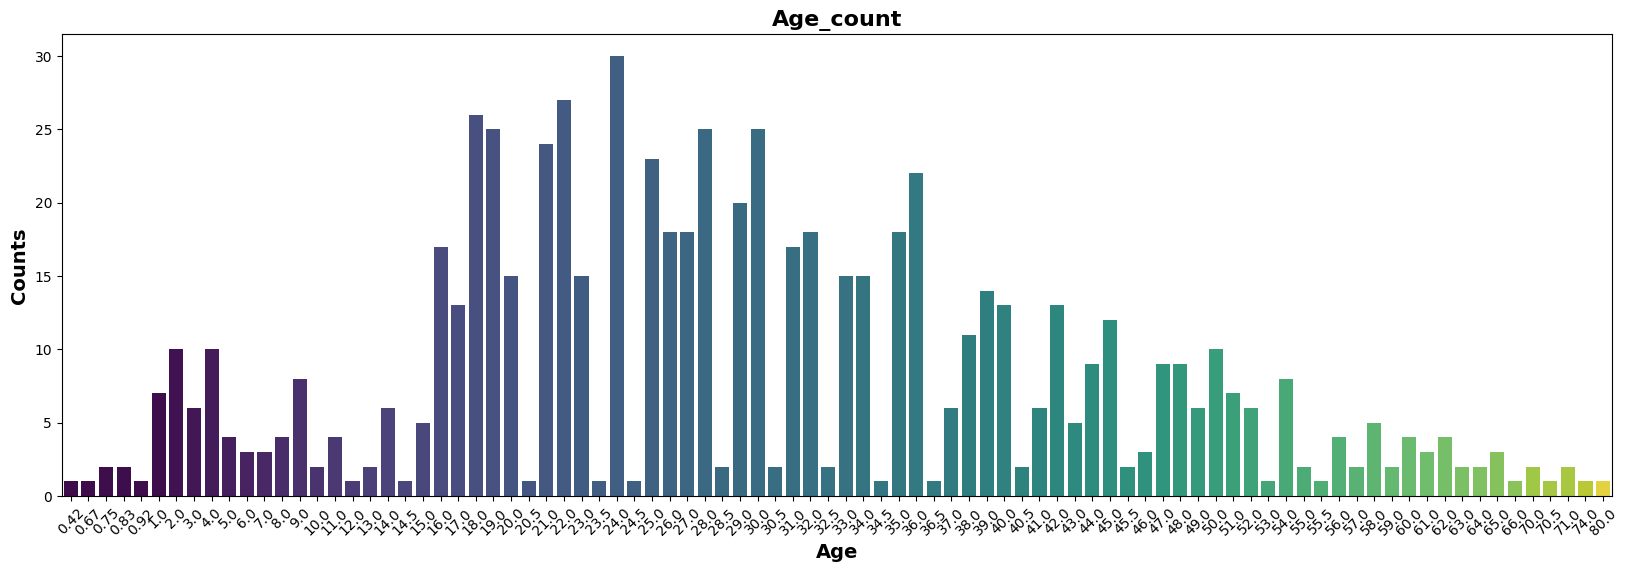

In [121]:
# Visualizar a contagem de idades
plt.figure(figsize=(20, 6))
sns.barplot(x=age.index, y=age.values, hue=age.index, dodge=False, palette='viridis', legend=False)
plt.title('Age_count', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.show()

In [122]:
# Agrupando Generos por quantidade
sex=titanic['Sex'].value_counts()
print(sex)

Sex
male      577
female    314
Name: count, dtype: int64


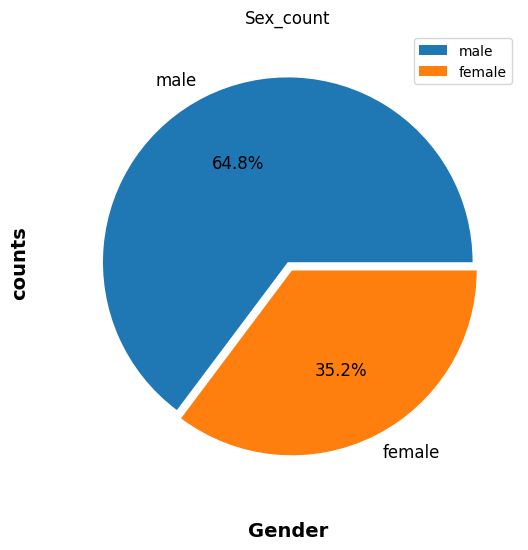

In [123]:
# Visualizar a contagem de Generos
plt.figure(figsize = (20, 6))
explode = (0,0.05)
sex.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Sex_count')
plt.xlabel('Gender', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = sex.index, loc = "best")
plt.show()

In [124]:
# Agrupando sobreviventes por quantidade
Survived_counts=titanic['Survived'].value_counts()
display(Survived_counts)

Survived
0    549
1    342
Name: count, dtype: int64

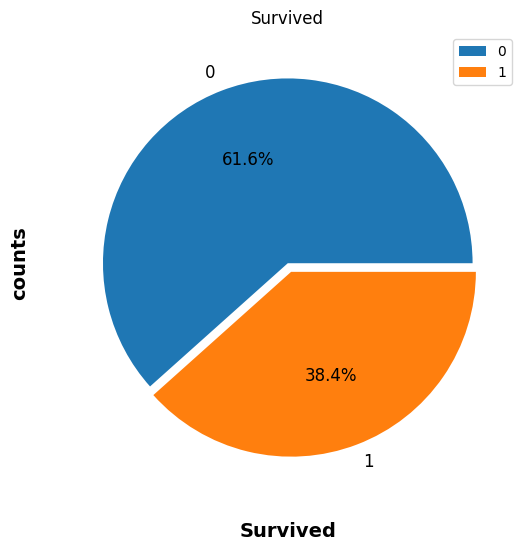

In [125]:
# Visualizar a contagem de sobreviventes
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

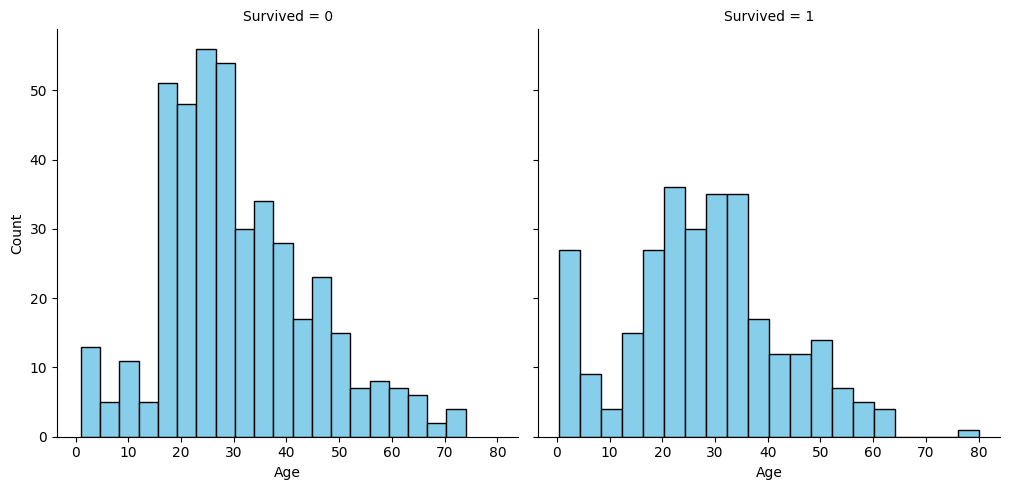

In [126]:
# Visualizar a contagem de sobreviventes por idade

# Utilizando sns.FacetGrid para comparar distribuições de idade entre sobreviventes e não sobreviventes do Titanic 

age = sns.FacetGrid(titanic, col='Survived', height=5, aspect=1.0)
age.map(plt.hist, 'Age', bins=20, color='skyblue', edgecolor='black')
age.set_axis_labels('Age', 'Count')
age.set_titles('Survived = {col_name}')
plt.show()

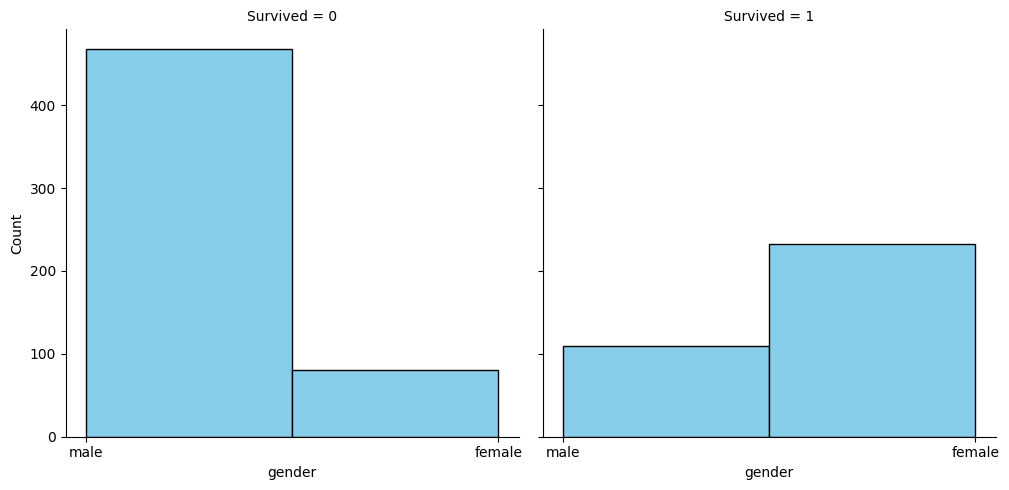

In [127]:
# Visualizar a contagem de sobreviventes por genero

# Utilizando sns.FacetGrid para comparar distribuições de genero entre sobreviventes e não sobreviventes do Titanic 

gender = sns.FacetGrid(titanic, col='Survived', height=5, aspect=1.0)
gender.map(plt.hist, 'Sex', bins=2, color='skyblue', edgecolor='black')
gender.set_axis_labels('gender', 'Count')
gender.set_titles('Survived = {col_name}')
plt.show()

In [ ]:
# Pré-processamento dos Dados

In [131]:
# Preenchendo valores faltantes de 'Age' com a mediana
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [132]:
# Preenchendo valores faltantes de 'Embarked' com a moda (valor mais frequente)
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [129]:
# Retirando colunas que não vai usar ou que vão atrapalhar o resultado
titanic=titanic.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [134]:
# Convertendo a variável categórica 'Sex'
titanic['Sex']=titanic['Sex'].replace({'male':1,'female':0})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [135]:
# Convertendo a variável categórica 'Embarked'
titanic['Embarked']=titanic['Embarked'].replace({'S':1,'C':2,'Q':3})
display(titanic)

C:\Users\julio.martins\AppData\Local\Temp\ipykernel_19252\1797681011.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Embarked']=titanic['Embarked'].replace({'S':1,'C':2,'Q':3})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,28.0,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,2


In [79]:
# Calculando a matriz de correlação
corr_matrix = titanic.corr()
display(corr_matrix)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [ ]:
# A correlação é uma medida estatística que indica a força e a direção de uma relação linear entre duas variáveis. Ela varia de -1 a 1:
# - 1 significa uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).
# - -1 significa uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui).
# - 0 significa que não há correlação linear entre as variáveis.
# No contexto do dataset Titanic, a correlação pode ajudar a identificar quais variáveis estão mais relacionadas entre si e com o fato de ter sobrevivido ou não (Survived).

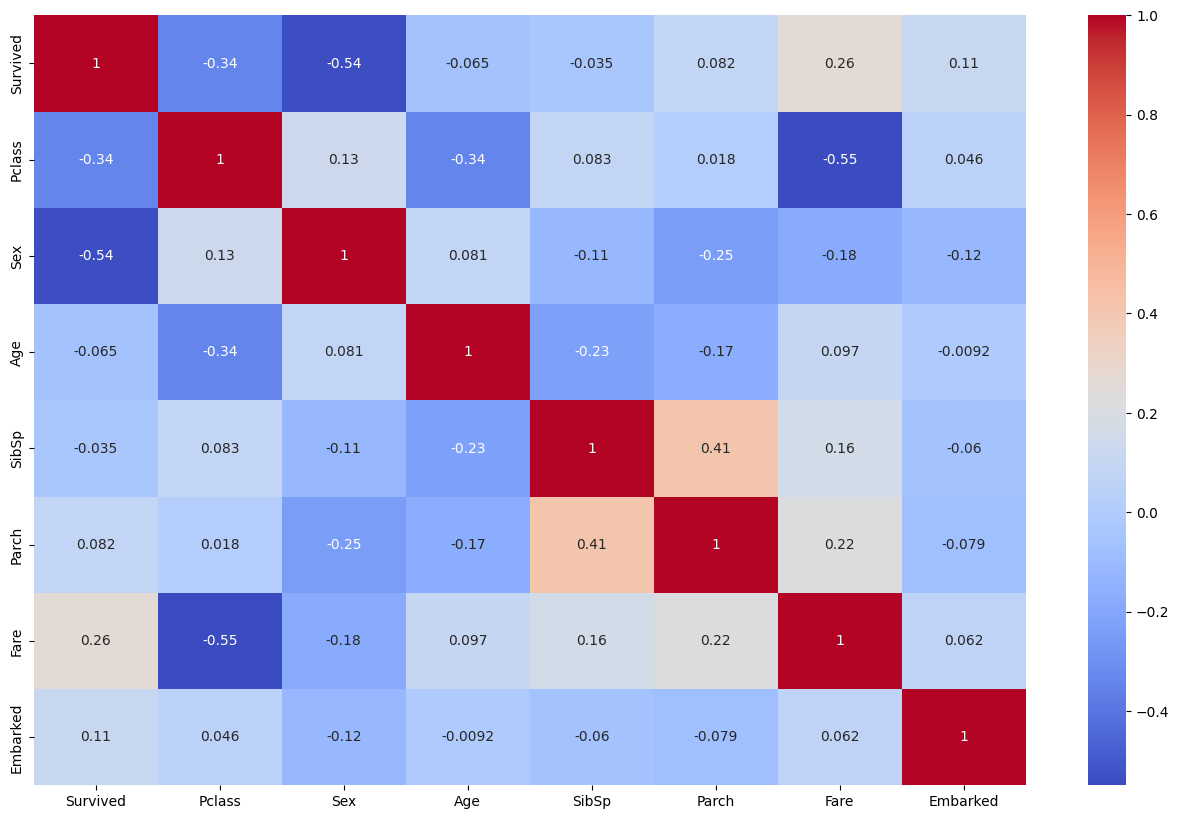

In [137]:
# Criando um mapa de calor
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [136]:
# definir recursos e alvo
x = titanic.drop(columns=['Survived'])
y = titanic['Survived']
display(x)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1
887,1,0,19.0,0,0,30.0000,1
888,3,0,28.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,2


In [90]:
# Escalonamento
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [91]:
# Transformação do target
y=y.values.reshape(-1,1)

In [93]:
# Divisão em treino e teste
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 7) (179, 7) (712, 1) (179, 1)


In [94]:
# Modelo Arvore de Decisão

# Opção de uso:
# - Mais conhecimentos sobre o modelo
# - As árvores de decisão são fáceis de entender e interpretar.
# - Árvores de decisão podem lidar facilmente com variáveis categóricas e numéricas sem necessidade de codificação prévia

# Criando o modelo de árvore de decisão com random_state definido
model = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)


model.score(X_train,y_train)

0.9789325842696629

In [96]:
# Fazendo previsões
y_pred=model.predict(X_test)

# Avaliando a acurácia do modelo
print(accuracy_score(y_test,y_pred))

0.7877094972067039


[[85 20]
 [18 56]]


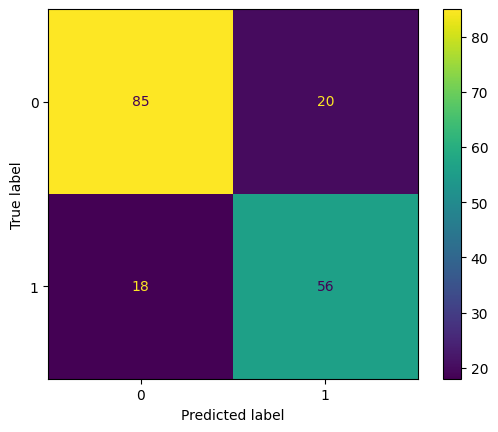

In [138]:
# Matriz de Confusão:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [ ]:
# True Negatives (TN): 85 - O modelo previu corretamente que 85 passageiros não sobreviveriam.
# False Positives (FP): 20 - O modelo previu incorretamente que 20 passageiros não sobreviveriam, quando na verdade sobreviveram.
# False Negatives (FN): 18 - O modelo previu incorretamente que 18 passageiros sobreviveriam, quando na verdade não sobreviveram.
# True Positives (TP): 56 - O modelo previu corretamente que 56 passageiros sobreviveriam.

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [140]:
# Salvar o modelo
joblib.dump(model, 'modelo_arvore_decisao.pkl')

['modelo_arvore_decisao.pkl']